# 04_perceptron

# Q1：Logistic Sigmoid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png" height="30%" width="30%" align="left">

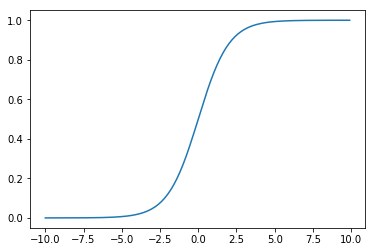

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2：Logistic Sigmoid をアクティベーション関数として持つ、<br>&emsp;&emsp;&emsp;パーセプトロンのモデルについて調べ説明せよ。

# A2.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  

### 【Logistic Sigmoidをアクティベーション関数に持つパーセプトロンモデル】

<img src="images/method.png" height="50%" width="50%" align="left">

# Q3：0 を false, 1 を true としたとき、論理否定を行う関数を、<br>&emsp;&emsp;&emsp;Logistic Sigmoid をアクティベーション関数として<br>&emsp;&emsp;&emsp;持つパーセプトロンを用いて作成せよ。<br><br>&emsp;&emsp;&emsp;パーセプトロンのパラメータの調整には、<br>&emsp;&emsp;&emsp;平均二乗誤差と最急降下法を用いること。<br><br>&emsp;&emsp;&emsp;また、調整済みのパラメータを保存し、<br>&emsp;&emsp;&emsp;作成した関数を他のプログラムからいつでも利用できるようにせよ。

# A3. 

<table>
<tbody>
<tr>
<td width="25%">
<img src="images/perseptorn.png"/>
    <p>パーセプトロン構成図</p>
</td>
<td width="25%">
<img src="images/exp_diff.png"/>
    <p>指数微分の確認</p>
</td>
<td width="25%">
<img src="images/param_a.png"/>
    <p>パラメータa 更新式</p>
</td>
<td width="25%">
<img src="images/param_b.png"/>
    <p>パラメータb 更新式</p>
</td>
</tr>
</tbody>
</table>

**用意するデータ**  
入力データ = np.array([0,0,・・・,0])  # 5000個  
正解データ = np.array([1, 1,・・・・,1])  # 5000個  
データ総数nとする  


**入力層(式)**  
$
y= a*X+ b
$

**中間層(シグモイド関数: a=1とする)**  
$ 
S = \frac{1}{1-e^-y}  
$

**誤差関数(平均二乗誤差)**  
平均二乗誤差とは、予測値と真の値の離れ具合の平均を求める。  
引用：http://ebw.eng-book.com/heishin/MeanSquaredError_mean_squared_error_calculation.do?category=mean_squared_error  


**誤差関数式(平均二乗誤差)**  

**※正解データを Z と置く**  
$
平均二乗誤差 = \frac{1}{データの総数(n)}\sum_{i}(予測データ - Z_i)^2
$  

**パラメータ更新式**   
$  
E(a) = \frac{1}{n}\sum_{i}{((\frac{1}{1-e^-(aX_i+b)}) -Z_i)^2}
$


パラメータ更新では、予測値Sと正解データZの誤差が最小になるよう更新する  
最急降下法を使いパラメータ更新を行う。  

**最急降下法**  
$
a^(k+1) = a^(k) - α\frac{d \frac{1}{n}\sum_{i}((\frac{1}{1+e^-(aX_i+b)})-Z_i)^2}{d  a}
$  

**パラメータa 更新式**  
$
a^(k+1) = a^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*\frac{1}{1+e^-aX_i+b}*(X_i-\frac{1}{1+e^-aX_i+b}))  
$

**パラメータb 更新式**  
$
b^(k+1) =  b^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))
$

<img src="images/q4.png" height="100%" width="100%" align="left">

### 入力データ用意

In [3]:
q3_input_data = np.zeros(5000)  # 0の配列
q3_answer = np.ones(5000)  # 1の配列
q3_data = np.stack([q3_input_data, q3_answer],1)

# 学習

誤差 :  0.18109917149760932
誤差 :  0.1704812449225962
誤差 :  0.16065451046505802
誤差 :  0.15156634646120906
誤差 :  0.14316409571516847
誤差 :  0.13539623117159152
誤差 :  0.12821318834356832
誤差 :  0.12156792233486098
誤差 :  0.11541624540121627
誤差 :  0.10971699542465545
誤差 :  0.10443207841859264
誤差 :  0.09952642055968425
誤差 :  0.0949678580483313
誤差 :  0.09072698674487295
誤差 :  0.0867769881648988
誤差 :  0.08309344404448993
誤差 :  0.07965414821921882
誤差 :  0.07643892187299293
誤差 :  0.07342943617459637
誤差 :  0.07060904480260766
誤差 :  0.06796262775346645
誤差 :  0.06547644703876572
誤差 :  0.06313801432927857
誤差 :  0.06093597023565642
誤差 :  0.05885997467930785
誤差 :  0.05690060766699422
誤差 :  0.05504927971086568
誤差 :  0.053298151110858234
誤差 :  0.05164005932425656
誤差 :  0.05006845367552705
誤差 :  0.04857733670116313
誤差 :  0.04716121147276754
誤差 :  0.04581503429347512
誤差 :  0.0445341722151794
誤差 :  0.043314364874646544
誤差 :  0.04215169019560399
誤差 :  0.04104253354875487
誤差 :  0.03998356000380638
誤差 :  0.038971

誤差 :  0.003575679200789886
誤差 :  0.0035643943460763024
誤差 :  0.0035531783065335704
誤差 :  0.0035420304648461146
誤差 :  0.003530950210980944
誤差 :  0.003519936942081789
誤差 :  0.003508990062365007
誤差 :  0.0034981089830172407
誤差 :  0.0034872931220937316
誤差 :  0.003476541904419048
誤差 :  0.003465854761490224
誤差 :  0.003455231131381813
誤差 :  0.003444670458651761
誤差 :  0.0034341721942452415
誤差 :  0.0034237357954102505
誤差 :  0.00341336072560231
誤差 :  0.0034030464543985672
誤差 :  0.0033927924574147445
誤差 :  0.0033825982162127644
誤差 :  0.0033724632182250674
誤差 :  0.0033623869566668974
誤差 :  0.003352368930459596
誤差 :  0.0033424086441479145
誤差 :  0.003332505607823911
誤差 :  0.0033226593370478136
誤差 :  0.003312869352775776
誤差 :  0.0033031351812841023
誤差 :  0.003293456354095094
誤差 :  0.0032838324079057742
誤差 :  0.0032742628845173903
誤差 :  0.003264747330767621
誤差 :  0.0032552852984576433
誤差 :  0.0032458763442891865
誤差 :  0.0032365200297962233
誤差 :  0.0032272159212797325
誤差 :  0.0032179635897442702
誤差 :  0

誤差 :  0.0016756638272905644
誤差 :  0.0016730830978220529
誤差 :  0.0016705101394984315
誤差 :  0.0016679449176513117
誤差 :  0.001665387397817682
誤差 :  0.0016628375457354977
誤差 :  0.00166029532734607
誤差 :  0.0016577607087899788
誤差 :  0.0016552336564059527
誤差 :  0.0016527141367310288
誤差 :  0.0016502021164965114
誤差 :  0.0016476975626289385
誤差 :  0.001645200442246934
誤差 :  0.0016427107226617064
誤差 :  0.0016402283713735052
誤差 :  0.0016377533560716284
誤差 :  0.0016352856446328599
誤差 :  0.0016328252051198676
誤差 :  0.001630372005779371
誤差 :  0.0016279260150424129
誤差 :  0.0016254872015215008
誤差 :  0.001623055534009768
誤差 :  0.0016206309814802999
誤差 :  0.0016182135130833849
誤差 :  0.0016158030981472812
誤差 :  0.0016133997061749067
誤差 :  0.0016110033068442195
誤差 :  0.001608613870005761
誤差 :  0.0016062313656826106
誤差 :  0.0016038557640671307
誤差 :  0.0016014870355229981
誤差 :  0.001599125150581127
誤差 :  0.00159677007993947
誤差 :  0.0015944217944621197
誤差 :  0.0015920802651774209
誤差 :  0.0015897454632787216
誤差

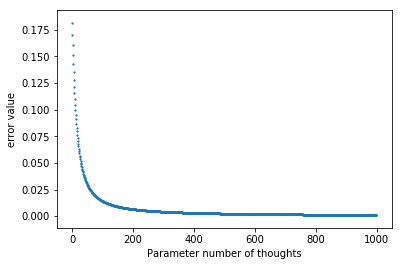

In [4]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b
    

if __name__=='__main__':
    np.random.shuffle(q3_data)  # 入力データをシャッフル
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.5  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}


    for _ in range(1000):
        # 最後のパラメータを保存
        parameter["a"].append(a)
        parameter["b"].append(b)
        y = neuron.input_layer(q3_data[:,0])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, q3_data[:,1])  # 出力層　： 誤差関数

        a, b = neuron.parameter_update(q3_data[:,0], q3_data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a"].append(a)
        parameter["b"].append(b)
            
        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    print("書き出し parameter['a'][-1] : ", parameter['a'][-1])
    print("書き出し parameter['b'][-1] : ", parameter['b'][-1])
    
    with open('output/output_Q3.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1.5)

    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()

# Q4. 真の入力値が 0 のとき関数の受け取る入力が平均 0 標準偏差 0.5 の<br>&emsp;&emsp;正規分布に従い、真の入力値が 1 のとき関数の受け取る入力が<br>&emsp;&emsp;平均 1 分散 0.5 の正規分布に従うとする。<br><br>&emsp;&emsp;この時、問題 3 で作成した論理否定を行う関数の正解率を求め、<br>&emsp;&emsp;その結果について考察し、必要があれば正解率を改善せよ。

# ----------------------------------------------------------------------
# 学習データ(入力値)作成

## 真の値が0の時に入力値は「平均0, 標準偏差√0.01の正規分布に従う」

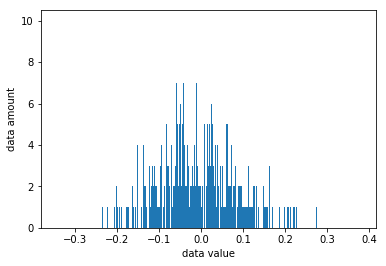

In [5]:
# 真の入力値が 0の時
input_0_data = np.random.normal(0, math.sqrt(0.01), (1,5000))

plt.hist(input_0_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

##  真の入力値は「 1 のとき関数の受け取る入力が平均 1 標準偏差√0.01 の正規分布に従う」

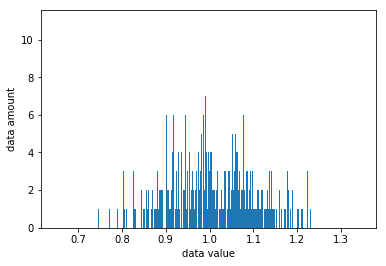

In [6]:
# 真の入力値が 1の時
input_1_data = np.random.normal(1, math.sqrt(0.01), (1,5000))
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

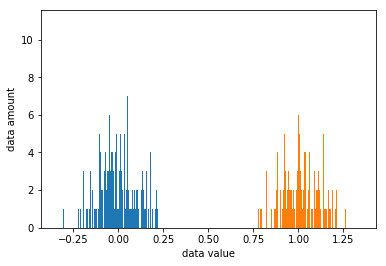

In [7]:
plt.hist(input_0_data[0], 5000)
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

In [8]:
# 入力値を結合して準備
input_data = np.concatenate([input_0_data[0], input_1_data[0]])
input_data

array([-0.01737259, -0.0652143 ,  0.0943022 , ...,  1.00447926,
        0.96269377,  0.93704385])

### 作成済みデータを保存

In [9]:
# print(type(input_1_data))
# #csvファイルとして保存
# np.savetxt('input_0_data.csv',input_0_data,delimiter=',')
# np.savetxt('input_1_data.csv',input_1_data,delimiter=',')

### 正解データを作る

In [10]:
# 正解データを作る
answer_0 = np.zeros(5000)  # 0の配列
answer_1 = np.ones(5000)  # 1の配列
answer = np.concatenate([answer_1, answer_0])  # 1,0配列を横に結合
answer

array([1., 1., 1., ..., 0., 0., 0.])

# 学習

誤差 :  0.32877743840717477
誤差 :  0.32653515874615957
誤差 :  0.3242904428887273
誤差 :  0.32204399846707427
誤差 :  0.3197965395224276
誤差 :  0.31754878515728635
誤差 :  0.31530145815503285
誤差 :  0.31305528357290374
誤差 :  0.3108109873144359
誤差 :  0.30856929468788197
誤差 :  0.306330928957137
誤差 :  0.3040966098918901
誤差 :  0.30186705232384203
誤差 :  0.29964296471569835
誤差 :  0.29742504774975737
誤差 :  0.2952139929426801
誤差 :  0.2930104812929517
誤差 :  0.29081518196730616
誤差 :  0.2886287510320705
誤差 :  0.2864518302351426
誤差 :  0.28428504584391356
誤差 :  0.2821290075440172
誤差 :  0.2799843074034078
誤差 :  0.2778515189057171
誤差 :  0.27573119605642427
誤差 :  0.2736238725647696
誤差 :  0.2715300611038769
誤差 :  0.2694502526509483
誤差 :  0.26738491590889224
誤差 :  0.2653344968101784
誤差 :  0.2632994181031829
誤差 :  0.2612800790207667
誤差 :  0.25927685503031755
誤差 :  0.25729009766406297
誤差 :  0.25532013442788737
誤差 :  0.25336726878662824
誤差 :  0.2514317802232827
誤差 :  0.24951392436935388
誤差 :  0.2476139332030753
誤差 :  0

誤差 :  0.054364582694880946
誤差 :  0.05415672761690598
誤差 :  0.05395002761628565
誤差 :  0.05374447605320869
誤差 :  0.05354006631865497
誤差 :  0.053336791834358736
誤差 :  0.05313464605276468
誤差 :  0.05293362245698752
誤差 :  0.05273371456077089
誤差 :  0.052534915908447145
誤差 :  0.052337220074894414
誤差 :  0.05214062066549602
誤差 :  0.05194511131609768
誤差 :  0.05175068569296732
誤差 :  0.05155733749274996
誤差 :  0.0513650604424256
誤差 :  0.05117384829926678
誤差 :  0.05098369485079251
誤差 :  0.05079459391472515
誤差 :  0.05060653933894421
誤差 :  0.05041952500144029
誤差 :  0.05023354481026981
誤差 :  0.05004859270350572
誤差 :  0.04986466264919082
誤差 :  0.04968174864528895
誤差 :  0.049499844719633174
誤差 :  0.049318944929878546
誤差 :  0.049139043363448286
誤差 :  0.04896013413748377
誤差 :  0.04878221139878789
誤差 :  0.048605269323774826
誤差 :  0.04842930211841422
誤差 :  0.048254304018173634
誤差 :  0.04808026928796383
誤差 :  0.047907192222080765
誤差 :  0.04773506714414546
誤差 :  0.04756388840704796
誤差 :  0.04739365039288165
誤差 

誤差 :  0.022283430681154584
誤差 :  0.022240159016987816
誤差 :  0.02219706505340294
誤差 :  0.022154147828895167
誤差 :  0.02211140638804231
誤差 :  0.022068839781462356
誤差 :  0.022026447065773783
誤差 :  0.02198422730355353
誤差 :  0.02194217956329637
誤差 :  0.021900302919374653
誤差 :  0.021858596451997853
誤差 :  0.021817059247174007
誤差 :  0.021775690396668074
誤差 :  0.02173448899796392
誤差 :  0.021693454154225723
誤差 :  0.021652584974257472
誤差 :  0.02161188057246605
誤差 :  0.0215713400688224
誤差 :  0.021530962588823137
誤差 :  0.02149074726345364
誤差 :  0.021450693229149935
誤差 :  0.021410799627761344
誤差 :  0.021371065606514934
誤差 :  0.02133149031797644
誤差 :  0.021292072920015837
誤差 :  0.021252812575770483
誤差 :  0.021213708453609176
誤差 :  0.02117475972709596
誤差 :  0.02113596557495568
誤差 :  0.021097325181037595
誤差 :  0.021058837734281674
誤差 :  0.02102050242868299
誤差 :  0.020982318463257186
誤差 :  0.020944285042007415
誤差 :  0.020906401373888397
誤差 :  0.020868666672774663
誤差 :  0.02083108015742546
誤差 :  0.0207936

誤差 :  0.014201484353101321
誤差 :  0.014186483842349187
誤差 :  0.01417152480199532
誤差 :  0.014156607069584857
誤差 :  0.014141730483467679
誤差 :  0.014126894882791646
誤差 :  0.01411210010749906
誤差 :  0.014097345998321239
誤差 :  0.014082632396774798
誤差 :  0.014067959145156234
誤差 :  0.014053326086538127
誤差 :  0.014038733064764015
誤差 :  0.014024179924444108
誤差 :  0.014009666510950858
誤差 :  0.01399519267041519
誤差 :  0.013980758249720532
誤差 :  0.013966363096499788
誤差 :  0.013952007059131145
誤差 :  0.013937689986732206
誤差 :  0.01392341172915743
誤差 :  0.01390917213699305
誤差 :  0.013894971061552625
誤差 :  0.013880808354873621
誤差 :  0.013866683869712381
誤差 :  0.013852597459540766
誤差 :  0.013838548978541912
誤差 :  0.013824538281604952
誤差 :  0.013810565224322675
誤差 :  0.013796629662986297
最終パラメータ a :  -6.778082671112492
最終パラメータ b :  1.925058596441331
最終誤差:  0.013796629662986297
学習回数 : 1000 回


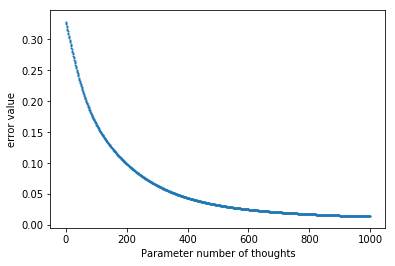

In [11]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b

if __name__=='__main__':
    data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] 
    
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,1])  # 出力層　： 誤差関数

        a, b = neuron.parameter_update(data[:,0], data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a"].append(a)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a : ", parameter["a"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# Q5 <br><br>0 を false, 1 を true としたとき、論理和、論理積<br>を実現するパーセプトロンを問 3, 4 のときと同様に作成せよ。

<table>
<tbody>
<tr>
<td width="25%">
<img src="images/q5_.png"/>
    <p>論理和、論理積、Q6:排他的論理和</p>
</td>
<td width="25%">
<img src="images/q5_parseptron.png"/>
    <p>多項式パーセプトリン</p>
</td>
<td width="25%">
<img src="images/q5_param_a.png"/>
    <p>パラメータa1、a2 更新式</p>
</td>
<td width="25%">
<img src="images/q5_param_b.png"/>
    <p>パラメータb 更新式</p>
</td>
</tr>
</tbody>
</table>

# A 「論理和」+「Q3: 入力値分散なし」

# 入力データ

In [12]:
# 入力データ作成 [入力A, 入力B, 正解値]
q5_data_OR = np.array([[1,1,1],
                                    [1,0,1],
                                    [0,1,1],
                                    [0,0,0]])

誤差 :  0.14202062607837013
誤差 :  0.14164274627667206
誤差 :  0.14126925435211812
誤差 :  0.14090005876963285
誤差 :  0.14053507028305307
誤差 :  0.14017420187306995
誤差 :  0.13981736868690608
誤差 :  0.13946448797968325
誤差 :  0.13911547905743682
誤差 :  0.13877026322173444
誤差 :  0.13842876371585594
誤差 :  0.1380909056724935
誤差 :  0.1377566160629306
誤差 :  0.13742582364766004
誤差 :  0.1370984589284014
誤差 :  0.13677445410147937
誤差 :  0.13645374301252572
誤差 :  0.1361362611124671
誤差 :  0.13582194541476325
誤差 :  0.1355107344538603
誤差 :  0.1352025682448243
誤差 :  0.1348973882441217
誤差 :  0.1345951373115141
誤差 :  0.1342957596730346
誤差 :  0.13399920088501568
誤差 :  0.13370540779913692
誤差 :  0.13341432852846435
誤差 :  0.13312591241445146
誤差 :  0.1328401099948745
誤差 :  0.13255687297267438
誤差 :  0.13227615418567948
誤差 :  0.13199790757718216
誤差 :  0.13172208816734549
誤差 :  0.13144865202541395
誤差 :  0.13117755624270683
誤差 :  0.13090875890636863
誤差 :  0.1306422190738566
誤差 :  0.1303778967481411
誤差 :  0.1301157528536008

誤差 :  0.08527392352561317
誤差 :  0.0852339204594526
誤差 :  0.08519416563625128
誤差 :  0.0851546582614804
誤差 :  0.08511539754010486
誤差 :  0.08507638267660084
誤差 :  0.08503761287497269
誤差 :  0.0849990873387709
誤差 :  0.08496080527110945
誤差 :  0.0849227658746835
誤差 :  0.08488496835178688
誤差 :  0.08484741190433011
誤差 :  0.08481009573385798
誤差 :  0.08477301904156753
誤差 :  0.08473618102832586
誤差 :  0.08469958089468804
誤差 :  0.08466321784091524
誤差 :  0.08462709106699258
誤差 :  0.08459119977264723
誤差 :  0.08455554315736649
誤差 :  0.08452012042041594
誤差 :  0.08448493076085746
誤差 :  0.08444997337756757
誤差 :  0.08441524746925531
誤差 :  0.08438075223448072
誤差 :  0.0843464868716729
誤差 :  0.08431245057914816
誤差 :  0.08427864255512842
誤差 :  0.08424506199775907
誤差 :  0.08421170810512771
誤差 :  0.08417858007528185
誤差 :  0.08414567710624749
誤差 :  0.0841129983960471
誤差 :  0.08408054314271796
誤差 :  0.08404831054433023
誤差 :  0.08401629979900527
誤差 :  0.08398451010493352
誤差 :  0.08395294066039302
誤差 :  0.0839215906

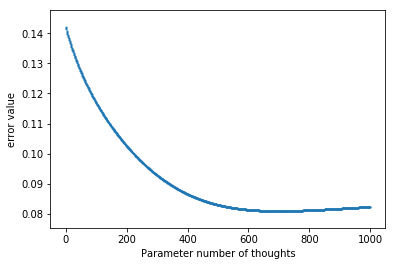

In [13]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a1, a2, b, v):
        self._a1 = a1  # 重みパラメータa1
        self._a2 = a2  # 重みパラメータa2        
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x1, x2):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a1*x1 + self._a2*x2 + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, x1, x2, answer, predicted_data):
        """パラメータ更新
        param1 : x1(入力1)
        param2 : x2(入力2)
        param3 : answer (正解値)
        param4 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a1 = self._a1 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x1-predicted_data)))))  # 重みパラメータa1
        self._a2 = self._a2 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x2-predicted_data)))))  # 重みパラメータa2       
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a1, self._a2, self._b

if __name__=='__main__':
    data = q5_data_OR  # [入力1, 入力2 , 正解データ] 
    
    a1 = 0.5   # 初期値のパラメータa1
    a2 = 0.5   # 初期値のパラメータa2
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a1, a2, b, v)  # インスタンス化 
    parameter = {"a1":[], "a2":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0], data[:,1])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,2])  # 出力層　： 誤差関数

        a1, a2, b = neuron.parameter_update(data[:,0], data[:,1], data[:,2], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a1"].append(a1)        
        parameter["a2"].append(a2)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a 1: ", parameter["a1"][-1])
    print("最終パラメータ a 2: ", parameter["a2"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# A 「論理積」+「Q3: 入力値分散なし」

# 入力データ

In [14]:
# 入力データ作成 [入力A, 入力B, 正解値]
q5_data_AND = np.array([[1,1,1],
                                    [1,0,0],
                                    [0,1,0],
                                    [0,0,0]])

誤差 :  0.33199510720598263
誤差 :  0.3311352622570949
誤差 :  0.33027141417460865
誤差 :  0.329403591330856
誤差 :  0.3285318244876549
誤差 :  0.3276561466604888
誤差 :  0.3267765929865267
誤差 :  0.3258932005964934
誤差 :  0.3250060084903959
誤差 :  0.3241150574171001
誤差 :  0.32322038975775086
誤差 :  0.3223220494130163
誤差 :  0.3214200816941386
誤差 :  0.3205145332177619
誤差 :  0.3196054518045107
誤差 :  0.31869288638128107
誤差 :  0.31777688688720945
誤差 :  0.31685750418327696
誤差 :  0.31593478996550595
誤差 :  0.3150087966817008
誤差 :  0.3140795774516881
誤差 :  0.3131471859909998
誤差 :  0.3122116765379527
誤差 :  0.3112731037840646
誤差 :  0.31033152280775533
誤差 :  0.3093869890112723
誤差 :  0.30843955806078527
誤差 :  0.30748928582958734
誤差 :  0.3065362283443453
誤差 :  0.30558044173433524
誤差 :  0.3046219821836026
誤差 :  0.3036609058859847
誤差 :  0.3026972690029309
誤差 :  0.3017311276240573
誤差 :  0.30076253773037304
誤差 :  0.2997915551601117
誤差 :  0.29881823557710385
誤差 :  0.29784263444162645
誤差 :  0.29686480698366274
誤差 :  0.295

誤差 :  0.07848787496685901
誤差 :  0.07839826867840782
誤差 :  0.07830921091460175
誤差 :  0.07822069488878157
誤差 :  0.07813271391017036
誤差 :  0.07804526138255014
誤差 :  0.07795833080295334
誤差 :  0.07787191576036954
誤差 :  0.07778600993446735
誤差 :  0.07770060709433091
誤差 :  0.07761570109721162
誤差 :  0.07753128588729463
誤差 :  0.07744735549447998
誤差 :  0.07736390403317872
誤差 :  0.0772809257011233
誤差 :  0.07719841477819263
誤差 :  0.07711636562525186
誤差 :  0.07703477268300585
誤差 :  0.07695363047086778
誤差 :  0.07687293358584107
誤差 :  0.0767926767014161
誤差 :  0.07671285456648022
誤差 :  0.07663346200424223
誤差 :  0.07655449391117021
誤差 :  0.07647594525594321
誤差 :  0.07639781107841638
誤差 :  0.07632008648859943
誤差 :  0.07624276666564883
誤差 :  0.0761658468568726
誤差 :  0.0760893223767487
誤差 :  0.07601318860595618
誤差 :  0.07593744099041905
誤差 :  0.07586207504036312
誤差 :  0.07578708632938543
誤差 :  0.07571247049353594
誤差 :  0.07563822323041185
誤差 :  0.075564340298264
誤差 :  0.07549081751511554
誤差 :  0.0754176507

誤差 :  0.060224300575008105
誤差 :  0.060189577905401435
誤差 :  0.060154900039944205
誤差 :  0.06012026684831796
誤差 :  0.06008567820103765
誤差 :  0.06005113396944336
誤差 :  0.060016634025692205
誤差 :  0.05998217824275028
誤差 :  0.059947766494384574
誤差 :  0.059913398655155194
誤差 :  0.059879074600407596
誤差 :  0.059844794206264915
誤差 :  0.05981055734962023
誤差 :  0.05977636390812927
誤差 :  0.059742213760202834
誤差 :  0.059708106784999576
誤差 :  0.059674042862418716
誤差 :  0.05964002187309289
誤差 :  0.05960604369838116
誤差 :  0.05957210822036189
誤差 :  0.05953821532182595
誤差 :  0.05950436488626993
誤差 :  0.05947055679788935
誤差 :  0.0594367909415719
誤差 :  0.05940306720289109
誤差 :  0.059369385468099556
誤差 :  0.059335745624122686
誤差 :  0.05930214755855239
誤差 :  0.05926859115964055
誤差 :  0.05923507631629318
誤差 :  0.059201602918063916
誤差 :  0.0591681708551483
誤差 :  0.05913478001837754
誤差 :  0.05910143029921267
誤差 :  0.05906812158973878
誤差 :  0.05903485378265909
誤差 :  0.059001626771289374
誤差 :  0.05896844044955222

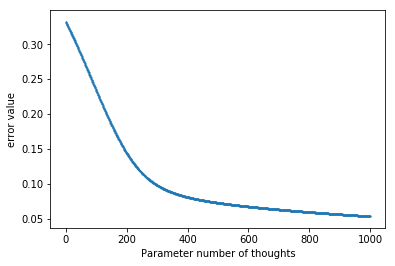

In [15]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a1, a2, b, v):
        self._a1 = a1  # 重みパラメータa1
        self._a2 = a2  # 重みパラメータa2        
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x1, x2):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a1*x1 + self._a2*x2 + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, x1, x2, answer, predicted_data):
        """パラメータ更新
        param1 : x1(入力1)
        param2 : x2(入力2)
        param3 : answer (正解値)
        param4 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a1 = self._a1 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x1-predicted_data)))))  # 重みパラメータa1
        self._a2 = self._a2 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x2-predicted_data)))))  # 重みパラメータa2       
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a1, self._a2, self._b

if __name__=='__main__':
    data = q5_data_AND  # [入力1, 入力2 , 正解データ] 
    
    a1 = 0.5   # 初期値のパラメータa1
    a2 = 0.5   # 初期値のパラメータa2
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a1, a2, b, v)  # インスタンス化 
    parameter = {"a1":[], "a2":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0], data[:,1])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,2])  # 出力層　： 誤差関数

        a1, a2, b = neuron.parameter_update(data[:,0], data[:,1], data[:,2], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a1"].append(a1)        
        parameter["a2"].append(a2)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a 1: ", parameter["a1"][-1])
    print("最終パラメータ a 2: ", parameter["a2"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# Q6.<br><br>0 を false, 1 を true としたとき、<br>排他的論理和を実現するパーセプトロンを<br>問 3, 4 のときと同様に作成せよ。<br><br>作成できない場合には、その理由について述べよ。

# A 「排他的論理和」+「Q3: 入力値分散なし」

# 入力データ

In [16]:
# 入力データ作成 [入力A, 入力B, 正解値]
q5_data_XOR = np.array([[1,1,0],
                                    [1,0,1],
                                    [0,1,1],
                                    [0,0,0]])

誤差 :  0.28493811759964943
誤差 :  0.28465389138141234
誤差 :  0.2843700996367871
誤差 :  0.28408676121485327
誤差 :  0.28380389495861885
誤差 :  0.2835215197030054
誤差 :  0.28323965427271325
誤差 :  0.2829583174799718
誤差 :  0.2826775281221688
誤差 :  0.2823973049793626
誤差 :  0.282117666811675
誤差 :  0.2818386323565646
誤差 :  0.2815602203259833
誤差 :  0.2812824494034131
誤差 :  0.28100533824078516
誤差 :  0.28072890545528284
誤差 :  0.2804531696260275
誤差 :  0.28017814929065
誤差 :  0.2799038629417473
誤差 :  0.27963032902322726
誤差 :  0.2793575659265428
誤差 :  0.2790855919868156
誤差 :  0.2788144254788534
誤差 :  0.2785440846130628
誤差 :  0.278274587531258
誤差 :  0.27800595230237035
誤差 :  0.27773819691806
誤差 :  0.2774713392882329
誤差 :  0.2772053972364671
誤差 :  0.27694038849534963
誤差 :  0.27667633070173003
誤差 :  0.2764132413918918
誤差 :  0.2761511379966474
誤差 :  0.2758900378363602
誤差 :  0.27562995811589663
誤差 :  0.27537091591951524
誤差 :  0.27511292820569444
誤差 :  0.27485601180190633
誤差 :  0.2746001833993389
誤差 :  0.27434545

誤差 :  0.25016579803811895
誤差 :  0.25016495012827267
誤差 :  0.25016410397975936
誤差 :  0.2501632596102892
誤差 :  0.250162417037615
誤差 :  0.250161576279521
誤差 :  0.25016073735381017
誤差 :  0.2501599002782942
誤差 :  0.2501590650707814
誤差 :  0.25015823174906743
誤差 :  0.25015740033092404
誤差 :  0.25015657083409015
誤差 :  0.25015574327626167
誤差 :  0.25015491767508263
誤差 :  0.2501540940481366
誤差 :  0.2501532724129377
誤差 :  0.2501524527869227
誤差 :  0.25015163518744254
誤差 :  0.2501508196317554
誤差 :  0.2501500061370189
誤差 :  0.250149194720283
誤差 :  0.2501483853984834
誤差 :  0.25014757818843464
誤差 :  0.2501467731068241
誤差 :  0.2501459701702056
誤差 :  0.250145169394994
誤差 :  0.2501443707974592
誤差 :  0.250143574393721
誤差 :  0.25014278019974384
誤差 :  0.2501419882313322
誤差 :  0.25014119850412536
誤差 :  0.25014041103359347
誤差 :  0.2501396258350328
誤差 :  0.25013884292356225
誤差 :  0.2501380623141186
誤差 :  0.2501372840214536
誤差 :  0.25013650806012994
誤差 :  0.2501357344445182
誤差 :  0.2501349631887938
誤差 :  0.250134

誤差 :  0.25000838115882185
誤差 :  0.25000830599451856
誤差 :  0.25000823146218343
誤差 :  0.2500081575570091
誤差 :  0.2500080842742187
誤差 :  0.25000801160906555
誤差 :  0.2500079395568331
誤差 :  0.25000786811283493
誤差 :  0.25000779727241446
誤差 :  0.2500077270309451
誤差 :  0.2500076573838295
誤差 :  0.2500075883265007
誤差 :  0.2500075198544205
誤差 :  0.25000745196308033
誤差 :  0.25000738464800065
誤差 :  0.2500073179047314
誤差 :  0.25000725172885113
誤差 :  0.25000718611596734
誤差 :  0.25000712106171663
誤差 :  0.25000705656176375
誤差 :  0.25000699261180204
誤差 :  0.25000692920755363
誤差 :  0.2500068663447684
誤差 :  0.25000680401922454
誤差 :  0.25000674222672836
誤差 :  0.25000668096311396
誤差 :  0.25000662022424336
誤差 :  0.25000656000600585
誤差 :  0.2500065003043187
誤差 :  0.25000644111512615
誤差 :  0.2500063824344001
誤差 :  0.25000632425813923
誤差 :  0.25000626658236946
誤差 :  0.25000620940314355
誤差 :  0.25000615271654103
誤差 :  0.25000609651866795
誤差 :  0.2500060408056571
誤差 :  0.2500059855736673
誤差 :  0.25000593081888406

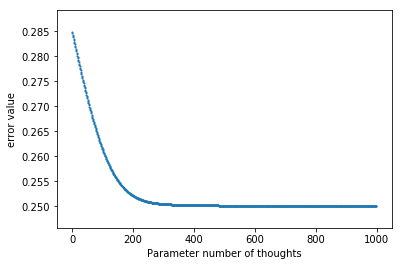

In [17]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a1, a2, b, v):
        self._a1 = a1  # 重みパラメータa1
        self._a2 = a2  # 重みパラメータa2        
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x1, x2):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a1*x1 + self._a2*x2 + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, x1, x2, answer, predicted_data):
        """パラメータ更新
        param1 : x1(入力1)
        param2 : x2(入力2)
        param3 : answer (正解値)
        param4 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a1 = self._a1 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x1-predicted_data)))))  # 重みパラメータa1
        self._a2 = self._a2 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x2-predicted_data)))))  # 重みパラメータa2       
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a1, self._a2, self._b

if __name__=='__main__':
    data = q5_data_XOR  # [入力1, 入力2 , 正解データ] 
    
    a1 = 0.5   # 初期値のパラメータa1
    a2 = 0.5   # 初期値のパラメータa2
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a1, a2, b, v)  # インスタンス化 
    parameter = {"a1":[], "a2":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0], data[:,1])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,2])  # 出力層　： 誤差関数

        a1, a2, b = neuron.parameter_update(data[:,0], data[:,1], data[:,2], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a1"].append(a1)        
        parameter["a2"].append(a2)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a 1: ", parameter["a1"][-1])
    print("最終パラメータ a 2: ", parameter["a2"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()

